In [9]:
import pandas as pd #importing libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
train=pd.read_csv("finaltraindata.csv")
#train data load
print(train.shape)

(1460, 81)


In [46]:
train.head(3) #first three rows of train data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,208500,0.235294,0.75,0.207668,0.033420,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
1,2,181500,0.000000,0.75,0.255591,0.038795,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
2,3,223500,0.235294,0.75,0.217252,0.046507,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75


(1459, 81)


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.052498,0.000000,0.0,0.0,0.184147,1.0,0.0,0.0,0.0,...,0.208333,0.0,0.0,0.0,0.0,0.000000,0.454545,1.0,0.0,0.0
1,1462,187758.393989,0.000000,1.0,0.0,0.232124,1.0,0.0,0.5,0.0,...,0.000000,0.0,0.0,1.0,0.0,0.735294,0.454545,1.0,0.0,0.0
2,1463,183583.683570,0.235294,1.0,0.0,0.224197,1.0,0.0,0.5,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.181818,1.0,0.0,0.0


In [49]:
y=train.iloc[:,1] #dependented feature of train data set
print(y.shape)
x=train.iloc[:,2:81] #independent feature of train data set
print(x.shape)

(1460,)
(1460, 79)


In [15]:
from sklearn.model_selection import train_test_split #spliting train data set into test and train 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=62)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
#respective size of test and train

(1168, 79)
(1168,)
(292, 79)
(292,)


(1459, 79)
(1459,)


In [16]:
#regression problem here we have to find relation with different featutre to find best realtion to find sales price
from sklearn.ensemble import RandomForestRegressor #random forest regressor
regressor=RandomForestRegressor()

In [17]:
#diffrent parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
max_features = ["auto", "sqrt"]
print(max_features)
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)
min_samples_leaf = [1, 2, 5, 10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [18]:
#diffrent paramters 
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV # creating model that perfrom hyperparameter tunning (random search cv)
cv=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="neg_mean_squared_error", n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [20]:
cv.fit(xtrain,ytrain) #fitting rondom search cv in xtrain and y train

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [21]:
cv.best_params_ #best estimators are as follows

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [69]:
cv.best_score_

-680523313.7651649

In [70]:
predictions=cv.predict(xtest) #predicting Xtest
print(predictions)

[139481.476      126401.673      259846.324      136236.059
 128156.50190476 205632.144      168160.926      132414.96171429
 218046.209      237495.241      158359.651      146497.606
 330087.729      133392.28557143 114261.642      156665.35
 218488.457      188731.938      308902.27       157873.982
 494737.975      103049.797      231964.49       160557.579
 197604.271      305384.971      195644.928      140563.942
 127579.577      211233.314      169031.093      150670.176
 145042.287      163309.423      163655.789      134755.8678
 366601.986      144275.439      139552.13166667 178546.155
 139199.379      120432.099      143141.219      199602.119
 111061.82981818 165742.299      128194.363       98341.415
 152712.116      133852.777      152358.268      156327.507
 157370.492      250088.517       94031.575      103471.366
 325881.961      189383.53870085 123437.258       95590.834
 176744.697      313167.441      151005.301      230191.0535
 430217.915      101102.356      1

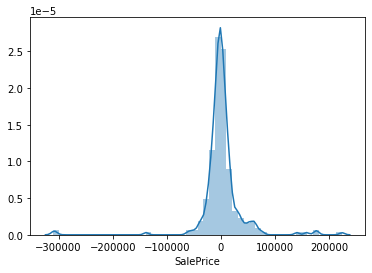

In [28]:
sns.distplot(ytest-predictions) #plotting sns ytest-ypred

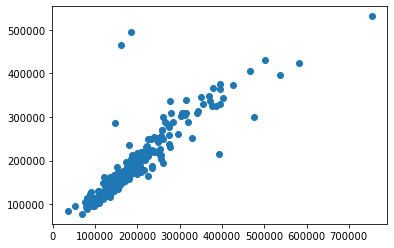

In [29]:
plt.scatter(ytest,predictions) #scatter plot for ytest and predcited value

In [30]:
#creating ,fitting applying random forest model
regressor=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=25)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
#score=accuracy_score(ypred,ytest)
from sklearn.metrics import r2_score # r2 for accuracy sore in regression problem
finalscore=r2_score(ytest, ypred)
print("score of our mdoel is ",+finalscore)

score of our mdoel is  0.7970246909471572


In [74]:
print("sales price of test data (from train split) i.e y---->test")
print("actual values")
print(ytest.head(10))
print("sales price of test data(from train split) i.ey'----->test")
print("predicted values")
predictions

sales price of test data (from train split) i.e y---->test
actual values
867     129000
422     113000
720     275000
291     135900
1119    133700
1409    215000
563     185000
484     132500
686     227875
1107    274725
Name: SalePrice, dtype: int64
sales price of test data(from train split) i.ey'----->test
predicted values


array([139481.476     , 126401.673     , 259846.324     , 136236.059     ,
       128156.50190476, 205632.144     , 168160.926     , 132414.96171429,
       218046.209     , 237495.241     , 158359.651     , 146497.606     ,
       330087.729     , 133392.28557143, 114261.642     , 156665.35      ,
       218488.457     , 188731.938     , 308902.27      , 157873.982     ,
       494737.975     , 103049.797     , 231964.49      , 160557.579     ,
       197604.271     , 305384.971     , 195644.928     , 140563.942     ,
       127579.577     , 211233.314     , 169031.093     , 150670.176     ,
       145042.287     , 163309.423     , 163655.789     , 134755.8678    ,
       366601.986     , 144275.439     , 139552.13166667, 178546.155     ,
       139199.379     , 120432.099     , 143141.219     , 199602.119     ,
       111061.82981818, 165742.299     , 128194.363     ,  98341.415     ,
       152712.116     , 133852.777     , 152358.268     , 156327.507     ,
       157370.492     , 2

In [31]:
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [79]:
test=pd.read_csv("finaltestdata.csv")
#test data load 
print("test data shape",test.shape)
test.head(3) #first three rows of test data
test.fillna(0,inplace=True) #there 3 nan values which are not converted into something in test data so im replacing with 0
testy=test.iloc[:,1]
testx=test.iloc[:,2:81]
print("independent feature of test data",testx.shape)
print("dependent feature of test data",testy.shape)

test data shape (1459, 81)
independent feature of test data (1459, 79)
dependent feature of test data (1459,)


In [80]:
predictionsmaintest=cv.predict(testx) #predicting original test data 
print(predictionsmaintest)

[137630.376 164125.524 168794.371 ... 156823.248 116390.558 207676.111]


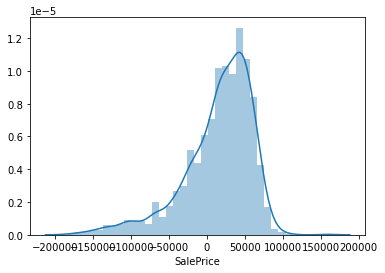

In [65]:
sns.distplot(testy-predictionsmaintest) #plotting sns testy-predictionmaintest

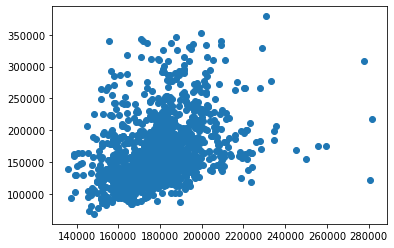

In [66]:
plt.scatter(testy,predictionsmaintest) #scatter plot for testy and predictionmaintest value

In [81]:
#creating ,fitting applying random forest model in our main test data and fiding its score
regressor1=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=25)
regressor1.fit(x,y) #original train data dependent an dindependent seprately
ypred1 = regressor.predict(testx)
from sklearn.metrics import r2_score # r2 for accuracy sore in regression problem
finalscore1=r2_score(testy, ypred1)
print("score of our mdoel is ",+finalscore)

score of our mdoel is  0.7970246909471572
